In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import TensorDataset, DataLoader
from torch.optim import lr_scheduler
import numpy as np
from numpy import random
import pandas as pd
from copy import deepcopy
import matplotlib.pyplot as plt
from sklearn import metrics
import statistics

In [2]:
class MLP(nn.Module):
    def __init__(self, in_dim=2, out_dim=2, w=2, depth=2, shp=None):
        super(MLP, self).__init__()
        if shp == None:
            shp = [in_dim] + [w]*(depth-1) + [out_dim]
            self.in_dim = in_dim
            self.out_dim = out_dim
            self.depth = depth
                 
        else:
            self.in_dim = shp[0]
            self.out_dim = shp[-1]
            self.depth = len(shp) - 1
        linear_list = []
        for i in range(self.depth):
            linear_list.append(nn.Linear(shp[i], shp[i+1]))
        self.linears = nn.ModuleList(linear_list)
        self.shp = shp
    
    def forward(self, x):
        
        # input shape = (batch_size, input_dim)
        # define activation here
        #f = lambda x: 0.5 * x * (1.0 + torch.tanh(math.sqrt(2.0 / math.pi) * (x + 0.044715 * torch.pow(x, 3.0))))
        f = torch.nn.SiLU()
        for i in range(self.depth-1):
            x = f(self.linears[i](x))
        x = self.linears[-1](x)
        # output shape = (batch_size, output_dim)
        return x

In [3]:
N = 10000 # number of samples
n = 2 # input numbers

In [4]:
X = torch.normal(0,1,size=(N, n))

In [5]:
y = []
for i in range(N):
    y.append([X[i][0]*X[i][1]])

In [6]:
y = torch.tensor(y)

In [7]:
X

tensor([[ 1.5386,  0.1047],
        [-0.4411,  0.6766],
        [-0.2474, -1.4252],
        ...,
        [-1.3155,  1.2652],
        [ 1.8891, -0.7887],
        [ 0.4402,  0.5206]])

In [8]:
y

tensor([[ 0.1610],
        [-0.2985],
        [ 0.3526],
        ...,
        [-1.6644],
        [-1.4899],
        [ 0.2292]])

In [9]:
dataset = TensorDataset(X, y)

In [10]:
batch_size = 128
dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=True)

In [11]:
loss_fn = nn.MSELoss()

In [12]:
def train(d):
    print(f"Training model with {d} nodes in hidden layer")
    shp = [2, d, 1]
    model = MLP(shp=shp)
    optimizer = torch.optim.Adam(model.parameters(), lr=0.1)
    scheduler = lr_scheduler.StepLR(optimizer, step_size=250, gamma=0.8)
    num_epochs = 10000
    training_loss = []
    for epoch in range(num_epochs):
        for X_batch, y_batch in dataloader:
            optimizer.zero_grad()
            y_pred = model(X_batch)
            loss = loss_fn(y_pred, y_batch)
            loss.backward()
            optimizer.step()

        scheduler.step()
        
        y_pred = model(X)
        epochloss = loss_fn(y_pred, y)
        training_loss.append(epochloss.item())
        if (epoch + 1) % 100 == 0:
            print(f'Epoch [{epoch+1}/{num_epochs}], Learning Rate: {optimizer.param_groups[0]["lr"]}, Loss: {epochloss}')
    plt.plot(training_loss, label=f'train_loss (d = {d})')
    plt.yscale("log")
    plt.legend(loc='lower left')
    plt.show
    plt.savefig(f'multiply-results/multiply{d}-4.png')

In [13]:
ds = [2, 3, 4, 5, 6, 7, 8, 9, 10, 15, 25, 50]

Training model with 2 nodes in hidden layer
Epoch [100/10000], Learning Rate: 0.1, Loss: 0.11245257407426834
Epoch [200/10000], Learning Rate: 0.1, Loss: 0.5445375442504883
Epoch [300/10000], Learning Rate: 0.08000000000000002, Loss: 0.5534116625785828
Epoch [400/10000], Learning Rate: 0.08000000000000002, Loss: 0.5273420214653015
Epoch [500/10000], Learning Rate: 0.06400000000000002, Loss: 0.551365077495575
Epoch [600/10000], Learning Rate: 0.06400000000000002, Loss: 0.5341973900794983
Epoch [700/10000], Learning Rate: 0.06400000000000002, Loss: 0.5542284250259399
Epoch [800/10000], Learning Rate: 0.051200000000000016, Loss: 0.5228914022445679
Epoch [900/10000], Learning Rate: 0.051200000000000016, Loss: 0.5262500643730164
Epoch [1000/10000], Learning Rate: 0.04096000000000002, Loss: 0.5419334769248962
Epoch [1100/10000], Learning Rate: 0.04096000000000002, Loss: 0.5215558409690857
Epoch [1200/10000], Learning Rate: 0.04096000000000002, Loss: 0.5228440165519714
Epoch [1300/10000], Lea

Epoch [100/10000], Learning Rate: 0.1, Loss: 0.015731491148471832
Epoch [200/10000], Learning Rate: 0.1, Loss: 0.023189911618828773
Epoch [300/10000], Learning Rate: 0.08000000000000002, Loss: 0.013658099807798862
Epoch [400/10000], Learning Rate: 0.08000000000000002, Loss: 0.022017402574419975
Epoch [500/10000], Learning Rate: 0.06400000000000002, Loss: 0.010827131569385529
Epoch [600/10000], Learning Rate: 0.06400000000000002, Loss: 0.016323089599609375
Epoch [700/10000], Learning Rate: 0.06400000000000002, Loss: 0.02443385310471058
Epoch [800/10000], Learning Rate: 0.051200000000000016, Loss: 0.010582584887742996
Epoch [900/10000], Learning Rate: 0.051200000000000016, Loss: 0.014685772359371185
Epoch [1000/10000], Learning Rate: 0.04096000000000002, Loss: 0.008963484317064285
Epoch [1100/10000], Learning Rate: 0.04096000000000002, Loss: 0.009245107881724834
Epoch [1200/10000], Learning Rate: 0.04096000000000002, Loss: 0.008392945863306522
Epoch [1300/10000], Learning Rate: 0.0327680

Epoch [9800/10000], Learning Rate: 1.6615349947311485e-05, Loss: 0.0012282026000320911
Epoch [9900/10000], Learning Rate: 1.6615349947311485e-05, Loss: 0.0012271917657926679
Epoch [10000/10000], Learning Rate: 1.3292279957849188e-05, Loss: 0.0012269633589312434
Training model with 4 nodes in hidden layer
Epoch [100/10000], Learning Rate: 0.1, Loss: 0.004291970282793045
Epoch [200/10000], Learning Rate: 0.1, Loss: 0.0031176810152828693
Epoch [300/10000], Learning Rate: 0.08000000000000002, Loss: 0.001833855640143156
Epoch [400/10000], Learning Rate: 0.08000000000000002, Loss: 0.0017716396832838655
Epoch [500/10000], Learning Rate: 0.06400000000000002, Loss: 0.0053563192486763
Epoch [600/10000], Learning Rate: 0.06400000000000002, Loss: 0.0020185341127216816
Epoch [700/10000], Learning Rate: 0.06400000000000002, Loss: 0.0016376577550545335
Epoch [800/10000], Learning Rate: 0.051200000000000016, Loss: 0.0011500660330057144
Epoch [900/10000], Learning Rate: 0.051200000000000016, Loss: 0.00

Epoch [9400/10000], Learning Rate: 2.596148429267419e-05, Loss: 1.7930742615135387e-05
Epoch [9500/10000], Learning Rate: 2.0769187434139353e-05, Loss: 1.7918744561029598e-05
Epoch [9600/10000], Learning Rate: 2.0769187434139353e-05, Loss: 1.7830750948633067e-05
Epoch [9700/10000], Learning Rate: 2.0769187434139353e-05, Loss: 1.8156302758143283e-05
Epoch [9800/10000], Learning Rate: 1.6615349947311485e-05, Loss: 1.782203617040068e-05
Epoch [9900/10000], Learning Rate: 1.6615349947311485e-05, Loss: 1.7799164197640494e-05
Epoch [10000/10000], Learning Rate: 1.3292279957849188e-05, Loss: 1.777195939212106e-05
Training model with 5 nodes in hidden layer
Epoch [100/10000], Learning Rate: 0.1, Loss: 0.017835015431046486
Epoch [200/10000], Learning Rate: 0.1, Loss: 0.00886065699160099
Epoch [300/10000], Learning Rate: 0.08000000000000002, Loss: 0.005485361907631159
Epoch [400/10000], Learning Rate: 0.08000000000000002, Loss: 0.002191440900787711
Epoch [500/10000], Learning Rate: 0.06400000000

Epoch [9000/10000], Learning Rate: 3.2451855365842736e-05, Loss: 3.0369434171007015e-05
Epoch [9100/10000], Learning Rate: 3.2451855365842736e-05, Loss: 3.0802788387518376e-05
Epoch [9200/10000], Learning Rate: 3.2451855365842736e-05, Loss: 3.0178311135387048e-05
Epoch [9300/10000], Learning Rate: 2.596148429267419e-05, Loss: 3.021467273356393e-05
Epoch [9400/10000], Learning Rate: 2.596148429267419e-05, Loss: 3.078129157074727e-05
Epoch [9500/10000], Learning Rate: 2.0769187434139353e-05, Loss: 3.042362368432805e-05
Epoch [9600/10000], Learning Rate: 2.0769187434139353e-05, Loss: 3.003407982760109e-05
Epoch [9700/10000], Learning Rate: 2.0769187434139353e-05, Loss: 3.018427742063068e-05
Epoch [9800/10000], Learning Rate: 1.6615349947311485e-05, Loss: 3.0132088795653544e-05
Epoch [9900/10000], Learning Rate: 1.6615349947311485e-05, Loss: 3.05431240121834e-05
Epoch [10000/10000], Learning Rate: 1.3292279957849188e-05, Loss: 3.0457253160420805e-05
Training model with 6 nodes in hidden la

Epoch [8600/10000], Learning Rate: 5.070602400912927e-05, Loss: 1.3239179679658264e-05
Epoch [8700/10000], Learning Rate: 5.070602400912927e-05, Loss: 1.3300174032337964e-05
Epoch [8800/10000], Learning Rate: 4.056481920730342e-05, Loss: 1.3135751032677945e-05
Epoch [8900/10000], Learning Rate: 4.056481920730342e-05, Loss: 1.3519844287657179e-05
Epoch [9000/10000], Learning Rate: 3.2451855365842736e-05, Loss: 1.314906057814369e-05
Epoch [9100/10000], Learning Rate: 3.2451855365842736e-05, Loss: 1.3210124052420724e-05
Epoch [9200/10000], Learning Rate: 3.2451855365842736e-05, Loss: 1.3222439520177431e-05
Epoch [9300/10000], Learning Rate: 2.596148429267419e-05, Loss: 1.3076469258521684e-05
Epoch [9400/10000], Learning Rate: 2.596148429267419e-05, Loss: 1.2975625395483803e-05
Epoch [9500/10000], Learning Rate: 2.0769187434139353e-05, Loss: 1.3026569831708912e-05
Epoch [9600/10000], Learning Rate: 2.0769187434139353e-05, Loss: 1.2920349945488852e-05
Epoch [9700/10000], Learning Rate: 2.07

Epoch [8200/10000], Learning Rate: 7.922816251426448e-05, Loss: 1.2884360330644995e-05
Epoch [8300/10000], Learning Rate: 6.338253001141159e-05, Loss: 1.2981546205992345e-05
Epoch [8400/10000], Learning Rate: 6.338253001141159e-05, Loss: 1.2535921086964663e-05
Epoch [8500/10000], Learning Rate: 5.070602400912927e-05, Loss: 1.2500044249463826e-05
Epoch [8600/10000], Learning Rate: 5.070602400912927e-05, Loss: 1.269064250664087e-05
Epoch [8700/10000], Learning Rate: 5.070602400912927e-05, Loss: 1.2425959539541509e-05
Epoch [8800/10000], Learning Rate: 4.056481920730342e-05, Loss: 1.2416917343216483e-05
Epoch [8900/10000], Learning Rate: 4.056481920730342e-05, Loss: 1.267871539312182e-05
Epoch [9000/10000], Learning Rate: 3.2451855365842736e-05, Loss: 1.2446102118701674e-05
Epoch [9100/10000], Learning Rate: 3.2451855365842736e-05, Loss: 1.2384963156364392e-05
Epoch [9200/10000], Learning Rate: 3.2451855365842736e-05, Loss: 1.2264448741916567e-05
Epoch [9300/10000], Learning Rate: 2.59614

Epoch [7800/10000], Learning Rate: 9.903520314283059e-05, Loss: 3.832177299045725e-06
Epoch [7900/10000], Learning Rate: 9.903520314283059e-05, Loss: 3.887332695740042e-06
Epoch [8000/10000], Learning Rate: 7.922816251426448e-05, Loss: 3.845211267616833e-06
Epoch [8100/10000], Learning Rate: 7.922816251426448e-05, Loss: 3.934928372473223e-06
Epoch [8200/10000], Learning Rate: 7.922816251426448e-05, Loss: 3.7849954424018506e-06
Epoch [8300/10000], Learning Rate: 6.338253001141159e-05, Loss: 3.8088694509497145e-06
Epoch [8400/10000], Learning Rate: 6.338253001141159e-05, Loss: 3.7758768485218752e-06
Epoch [8500/10000], Learning Rate: 5.070602400912927e-05, Loss: 3.835778898064746e-06
Epoch [8600/10000], Learning Rate: 5.070602400912927e-05, Loss: 3.803858817263972e-06
Epoch [8700/10000], Learning Rate: 5.070602400912927e-05, Loss: 3.828959961538203e-06
Epoch [8800/10000], Learning Rate: 4.056481920730342e-05, Loss: 3.7547629290202167e-06
Epoch [8900/10000], Learning Rate: 4.0564819207303

Epoch [7400/10000], Learning Rate: 0.0001547425049106728, Loss: 5.224570713835419e-07
Epoch [7500/10000], Learning Rate: 0.00012379400392853823, Loss: 4.7104219902394107e-07
Epoch [7600/10000], Learning Rate: 0.00012379400392853823, Loss: 5.186229259379616e-07
Epoch [7700/10000], Learning Rate: 0.00012379400392853823, Loss: 4.7160932581391535e-07
Epoch [7800/10000], Learning Rate: 9.903520314283059e-05, Loss: 5.521440584743686e-07
Epoch [7900/10000], Learning Rate: 9.903520314283059e-05, Loss: 4.596434450832021e-07
Epoch [8000/10000], Learning Rate: 7.922816251426448e-05, Loss: 4.687008470227738e-07
Epoch [8100/10000], Learning Rate: 7.922816251426448e-05, Loss: 4.521587868566712e-07
Epoch [8200/10000], Learning Rate: 7.922816251426448e-05, Loss: 4.3052750697825104e-07
Epoch [8300/10000], Learning Rate: 6.338253001141159e-05, Loss: 4.4677014443550433e-07
Epoch [8400/10000], Learning Rate: 6.338253001141159e-05, Loss: 4.393042161154881e-07
Epoch [8500/10000], Learning Rate: 5.0706024009

Epoch [7000/10000], Learning Rate: 0.00019342813113834098, Loss: 8.770037425165356e-07
Epoch [7100/10000], Learning Rate: 0.00019342813113834098, Loss: 6.037784601176099e-07
Epoch [7200/10000], Learning Rate: 0.00019342813113834098, Loss: 8.16491251498519e-07
Epoch [7300/10000], Learning Rate: 0.0001547425049106728, Loss: 5.019511490900186e-07
Epoch [7400/10000], Learning Rate: 0.0001547425049106728, Loss: 6.615397296627634e-07
Epoch [7500/10000], Learning Rate: 0.00012379400392853823, Loss: 5.547827299778874e-07
Epoch [7600/10000], Learning Rate: 0.00012379400392853823, Loss: 4.670568785059004e-07
Epoch [7700/10000], Learning Rate: 0.00012379400392853823, Loss: 4.987238639841962e-07
Epoch [7800/10000], Learning Rate: 9.903520314283059e-05, Loss: 4.809555775864283e-07
Epoch [7900/10000], Learning Rate: 9.903520314283059e-05, Loss: 5.368064535105077e-07
Epoch [8000/10000], Learning Rate: 7.922816251426448e-05, Loss: 4.93485231345403e-07
Epoch [8100/10000], Learning Rate: 7.9228162514264

Epoch [6600/10000], Learning Rate: 0.00030223145490365774, Loss: 5.83652990826522e-07
Epoch [6700/10000], Learning Rate: 0.00030223145490365774, Loss: 4.974083367415005e-07
Epoch [6800/10000], Learning Rate: 0.0002417851639229262, Loss: 6.066292712603172e-07
Epoch [6900/10000], Learning Rate: 0.0002417851639229262, Loss: 5.40289420314366e-07
Epoch [7000/10000], Learning Rate: 0.00019342813113834098, Loss: 6.800513006055553e-07
Epoch [7100/10000], Learning Rate: 0.00019342813113834098, Loss: 6.058711505829706e-07
Epoch [7200/10000], Learning Rate: 0.00019342813113834098, Loss: 4.219315030695725e-07
Epoch [7300/10000], Learning Rate: 0.0001547425049106728, Loss: 5.567616767621075e-07
Epoch [7400/10000], Learning Rate: 0.0001547425049106728, Loss: 8.069030741353345e-07
Epoch [7500/10000], Learning Rate: 0.00012379400392853823, Loss: 4.987234660802642e-07
Epoch [7600/10000], Learning Rate: 0.00012379400392853823, Loss: 4.600431680046313e-07
Epoch [7700/10000], Learning Rate: 0.000123794003

Epoch [6200/10000], Learning Rate: 0.0004722366482869652, Loss: 3.23070537433523e-07
Epoch [6300/10000], Learning Rate: 0.0003777893186295722, Loss: 3.045025778192212e-07
Epoch [6400/10000], Learning Rate: 0.0003777893186295722, Loss: 3.118743165941851e-07
Epoch [6500/10000], Learning Rate: 0.00030223145490365774, Loss: 2.903423990119336e-07
Epoch [6600/10000], Learning Rate: 0.00030223145490365774, Loss: 5.307425681166933e-07
Epoch [6700/10000], Learning Rate: 0.00030223145490365774, Loss: 2.428953678190737e-07
Epoch [6800/10000], Learning Rate: 0.0002417851639229262, Loss: 2.728553454289795e-07
Epoch [6900/10000], Learning Rate: 0.0002417851639229262, Loss: 3.5214983995501825e-07
Epoch [7000/10000], Learning Rate: 0.00019342813113834098, Loss: 3.751107442440116e-07
Epoch [7100/10000], Learning Rate: 0.00019342813113834098, Loss: 3.529084722231346e-07
Epoch [7200/10000], Learning Rate: 0.00019342813113834098, Loss: 2.428672019050282e-07
Epoch [7300/10000], Learning Rate: 0.00015474250

Epoch [5800/10000], Learning Rate: 0.0005902958103587065, Loss: 6.772472715965705e-07
Epoch [5900/10000], Learning Rate: 0.0005902958103587065, Loss: 1.23795678064198e-06
Epoch [6000/10000], Learning Rate: 0.0004722366482869652, Loss: 7.635484280399396e-07
Epoch [6100/10000], Learning Rate: 0.0004722366482869652, Loss: 6.810925583522476e-07
Epoch [6200/10000], Learning Rate: 0.0004722366482869652, Loss: 3.7818750797669054e-07
Epoch [6300/10000], Learning Rate: 0.0003777893186295722, Loss: 4.898626002614037e-07
Epoch [6400/10000], Learning Rate: 0.0003777893186295722, Loss: 4.952424319526472e-07
Epoch [6500/10000], Learning Rate: 0.00030223145490365774, Loss: 4.468731162887707e-07
Epoch [6600/10000], Learning Rate: 0.00030223145490365774, Loss: 3.814731144302641e-07
Epoch [6700/10000], Learning Rate: 0.00030223145490365774, Loss: 3.3391270903848635e-07
Epoch [6800/10000], Learning Rate: 0.0002417851639229262, Loss: 4.018876609279687e-07
Epoch [6900/10000], Learning Rate: 0.0002417851639

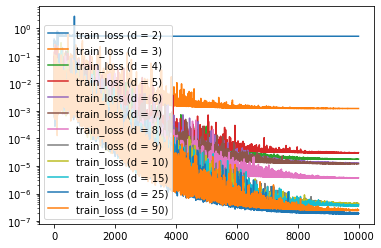

In [17]:
for d in ds:
    train(d)